In [6]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib
import shapely.wkt
import matplotlib.pyplot as plt
from shapely.geometry import shape
from scipy.stats import pearsonr
from matplotlib.ticker import StrMethodFormatter
from sklearn.metrics import r2_score

In [7]:
df = pd.read_csv('../data_per_location.csv')
df['geometry_text'] = df['geometry_text'].apply(shapely.wkt.loads)
gdf = gpd.GeoDataFrame(df, geometry='geometry_text', crs='epsg:4326')
gdf.head()

,geometry_text,geometry,path_id,image_point_id,order_id,safety_avg,attractiveness_avg,business_avg,safety_stddev,attractiveness_stddev,...,male_ratings,female_ratings,male_safety_avg,female_safety_avg,age_19_39_safety_avg,age_40_59_safety_avg,age_60_plus_safety_avg,age_19_39_safety_count,age_40_59_safety_count,age_60_plus_safety_count
0,POINT (954109.14300 6460965.88700),0101000020110F0000C74B3749FA1D2D41A69BC47889A5...,1,1492,17,3.3,2.8,1.67,0.87,0.83,...,2,6,3.50,3.17,3.25,3.25,NaN,4,4,0
1,POINT (954108.53200 6460996.64400),0101000020110F0000D34D6210F91D2D41C74B372991A5...,1,1491,18,3.3,2.8,2.00,0.96,0.96,...,2,2,2.50,4.00,4.00,3.00,NaN,1,3,0
2,POINT (954095.80500 6461022.92200),0101000020110F0000C3F5289CDF1D2D414A0C02BB97A5...,1,1490,19,4.3,4.0,2.00,0.58,0.00,...,2,1,4.50,4.00,NaN,4.33,NaN,0,3,0
3,POINT (954065.19500 6461024.92000),0101000020110F00003D0AD763A21D2D41AE47E13A98A5...,1,1489,20,4.0,3.9,2.50,0.53,0.64,...,6,2,4.00,4.00,4.00,4.00,NaN,5,3,0
4,POINT (954105.76900 6460935.45300),0101000020110F0000355EBA89F31D2D41B6F3FDDC81A5...,1,1493,16,3.7,2.8,2.67,0.52,0.41,...,3,3,3.33,4.00,3.75,3.50,NaN,4,2,0


# Visualizing the safety and attractiveness scores of a specific PATH

/var/folders/4_/5ybchgh55y7fn4h9d3s2pnzhj8qsdk/T/ipykernel_79755/4231534282.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_path.dropna(subset=['safety_avg'], inplace=True)


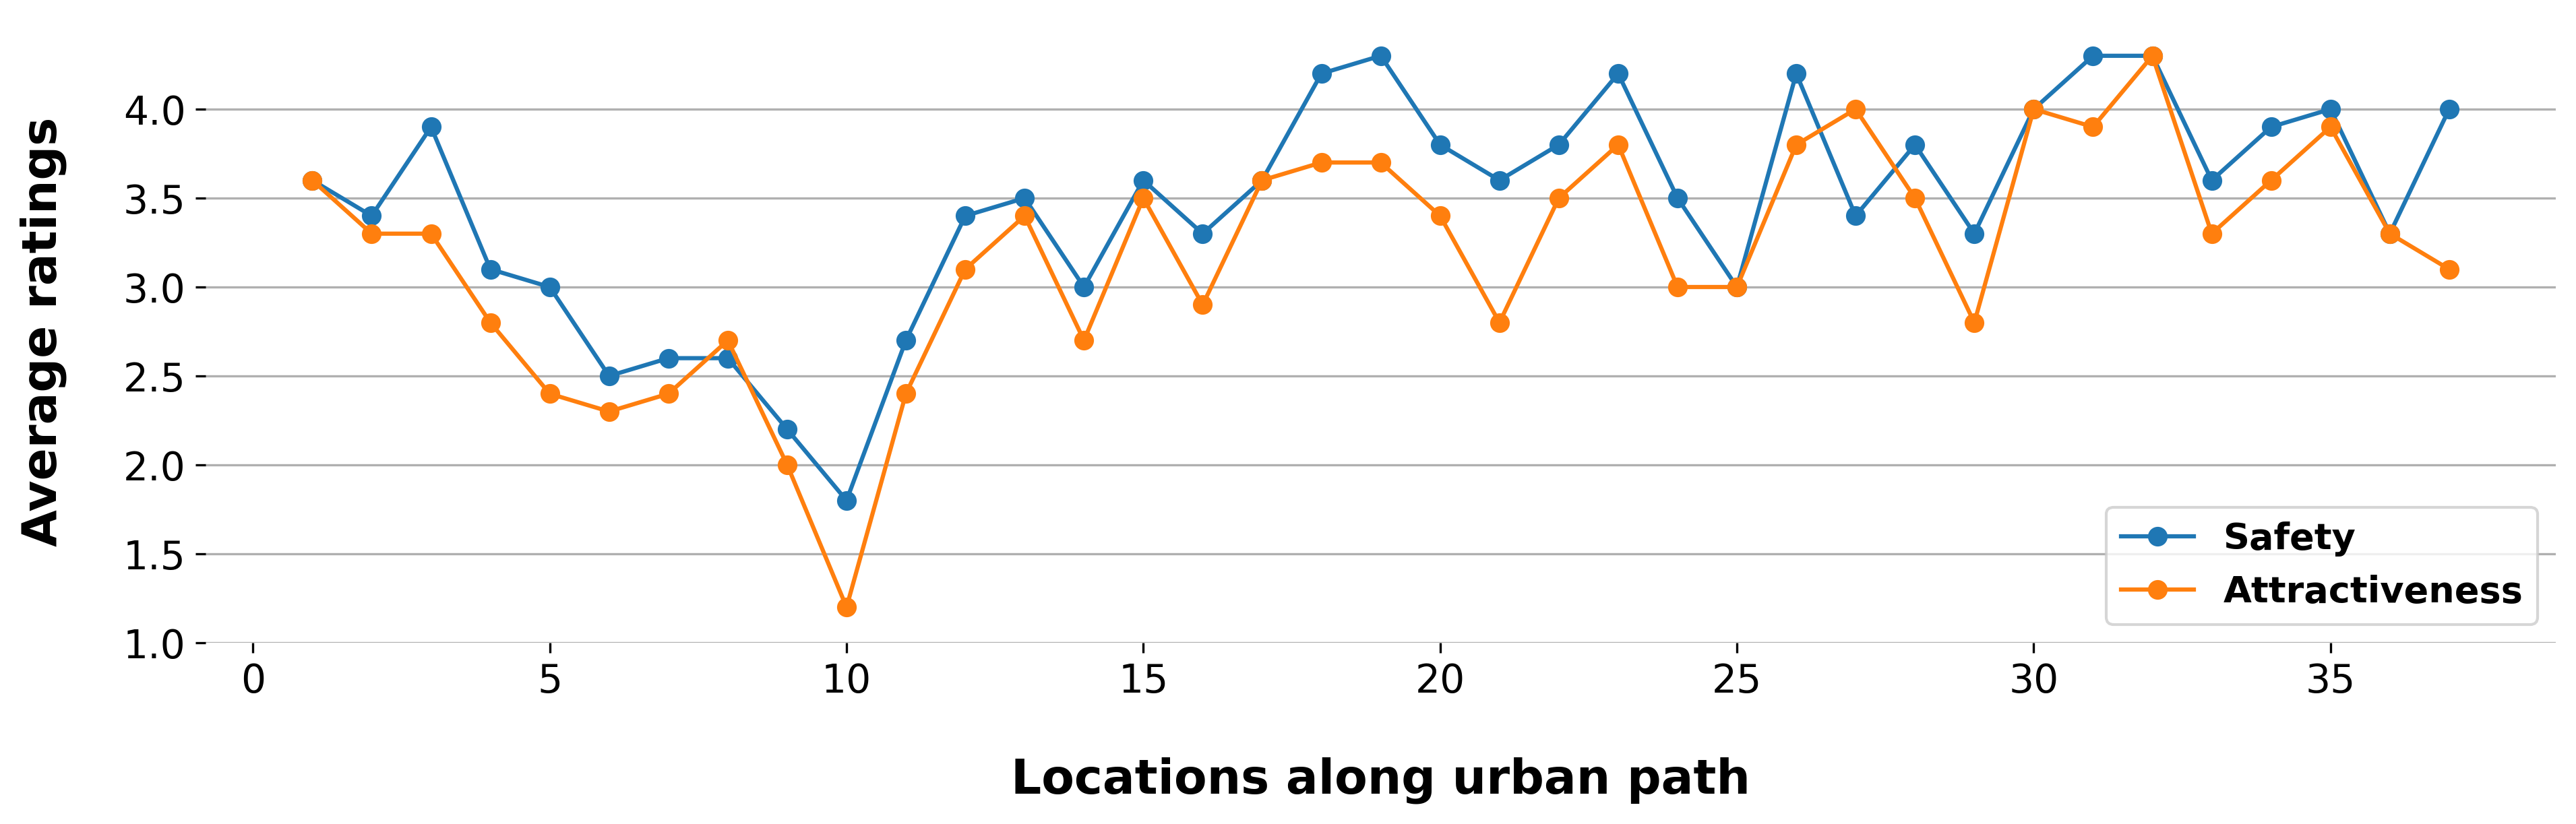

In [8]:
params = {'axes.titlesize':'18',
          'xtick.labelsize':'14',
          'ytick.labelsize':'14'}

matplotlib.rcParams.update(params)
# for i in range(1,28):
i=3
df_path = gdf[gdf.path_id==i]
# df_usr = gdf_usr[gdf_usr.path_id==i]


df_path.dropna(subset=['safety_avg'], inplace=True)
df_path = df_path.sort_values(by=['order_id'])

# df_usr.dropna(subset=['safety'], inplace=True)
# df_usr = df_usr.sort_values(by=['order_id'])

y = df_path.safety_avg.to_list()
x=df_path.order_id.to_list()
plt.figure(figsize=(15, 4), dpi=300)
ax = plt.gca()
ax.set_ylim([1, 4.5])

plt.title("")
# plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.yticks(np.arange(1, 4.5, 0.5))

plt.plot(x,y, linestyle='-', marker='o', label="Safety")

y = df_path.attractiveness_avg.to_list()
plt.plot(x,y,linestyle='-', marker='o', label="Attractiveness")
plt.ylabel("Average ratings", labelpad=20, weight='bold', size=17)
plt.xlabel("Locations along urban path", labelpad=20, weight='bold', size=17)

for spine in plt.gca().spines.values():
    spine.set_visible(False)


plt.grid(axis='y')
#     Set y-axis label
# x.set_ylabel("Number of locations", labelpad=20, weight='bold', size=17)

plt.legend(loc="lower right", prop={'size': 13,'weight':'bold'})

plt.savefig('path.png', dpi=300, bbox_inches='tight')





# Average Ratings

In [9]:
print("Safety")
print("1-2.5: ", gdf[(gdf.safety_avg<=2.5)].count().geometry, gdf[(gdf.safety_avg<=2.5)].count().geometry/gdf.count().geometry)

print("2.5-3.5: ",gdf[(gdf.safety_avg>2.5) & (gdf.safety_avg<3.5)].count().geometry, 
     gdf[(gdf.safety_avg>2.5) & (gdf.safety_avg<3.5)].count().geometry/gdf.count().geometry)

print("4-5: ",gdf[(gdf.safety_avg>=3.5) & (gdf.safety_avg<=5)].count().geometry,
     gdf[(gdf.safety_avg>=3.5) & (gdf.safety_avg<=5)].count().geometry/gdf.count().geometry)
print(gdf.count().geometry)

Safety
1-2.5:  44 0.05843293492695883
2.5-3.5:  374 0.49667994687915007
4-5:  335 0.4448871181938911
753


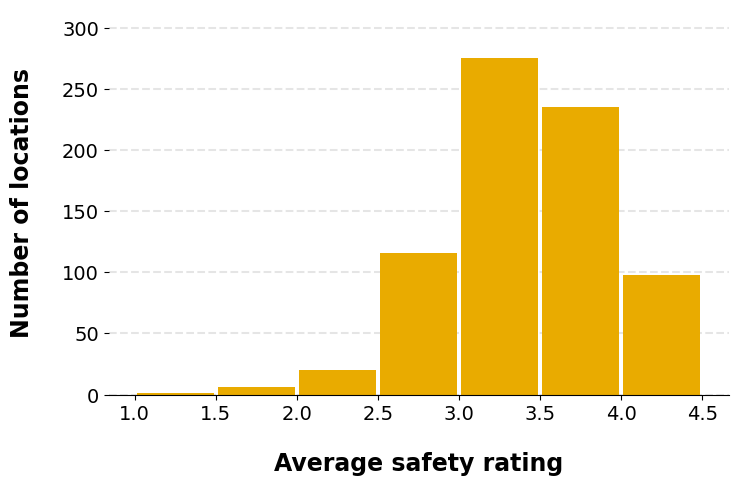

In [10]:
pd.get_option("display.max_columns")
params = {'axes.titlesize':'18',
          'xtick.labelsize':'14',
          'ytick.labelsize':'14'}
matplotlib.rcParams.update(params)
color= {} 
color['5']= "#E9AB00"
color['10'] = "#7B0E78"
color['15'] = None

# gdf.safety_avg.hist(bins=7)
ax = gdf.hist(column='safety_avg', color=color['5'], grid=False, 
                bins=np.arange(1,5,0.5), rwidth=0.95,zorder=2, figsize=(8,5))

ax = ax[0]

for x in ax:
    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", labelbottom="on",
                  left="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.2, color='grey', zorder=1)

#     Remove title
    x.set_title("")

#     Set x-axis label
    x.set_xlabel("Average safety rating", labelpad=20, weight='bold', size=17)

#     Set y-axis label
    x.set_ylabel("Number of locations", labelpad=20, weight='bold', size=17)

    # Format y-axis label
#     x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
#         plt.savefig("img/hist_age_div_" + city + "_" + env +".pdf")


In [11]:
print("Attractiveness")
print("1-2.5: ", gdf[(gdf.attractiveness_avg<=2.5)].count().geometry)

print("2.5-3.5: ",gdf[(gdf.attractiveness_avg>2.5) & (gdf.attractiveness_avg<3.5)].count().geometry)

print("3.5-5: ",gdf[(gdf.attractiveness_avg>=3.5)].count().geometry)
print(gdf.count().geometry)

Attractiveness
1-2.5:  184
2.5-3.5:  430
3.5-5:  139
753


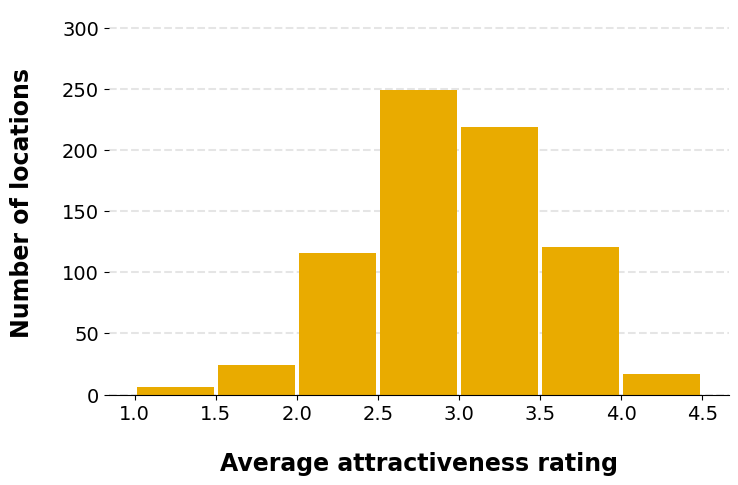

In [13]:
pd.get_option("display.max_columns")
params = {'axes.titlesize':'18',
          'xtick.labelsize':'14',
          'ytick.labelsize':'14'}
matplotlib.rcParams.update(params)
color= {} 
color['5']= "#E9AB00"
color['10'] = "#7B0E78"
color['15'] = None

# gdf.safety_avg.hist(bins=7)
ax = gdf.hist(column='attractiveness_avg', color=color['5'], grid=False, 
                bins=np.arange(1,5,0.5), rwidth=0.95,zorder=2, figsize=(8,5))

ax = ax[0]

for x in ax:
    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", labelbottom="on",
                  left="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.2, color='grey', zorder=1)

#     Remove title
    x.set_title("")

#     Set x-axis label
    x.set_xlabel("Average attractiveness rating", labelpad=20, weight='bold', size=17)

#     Set y-axis label
    x.set_ylabel("Number of locations", labelpad=20, weight='bold', size=17)

    # Format y-axis label
#     x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
#         plt.savefig("img/hist_age_div_" + city + "_" + env +".pdf")


# Check correlation between safety and attractiveness

0.8833672643879454 -0.06866262063551931
1.6980719081403715


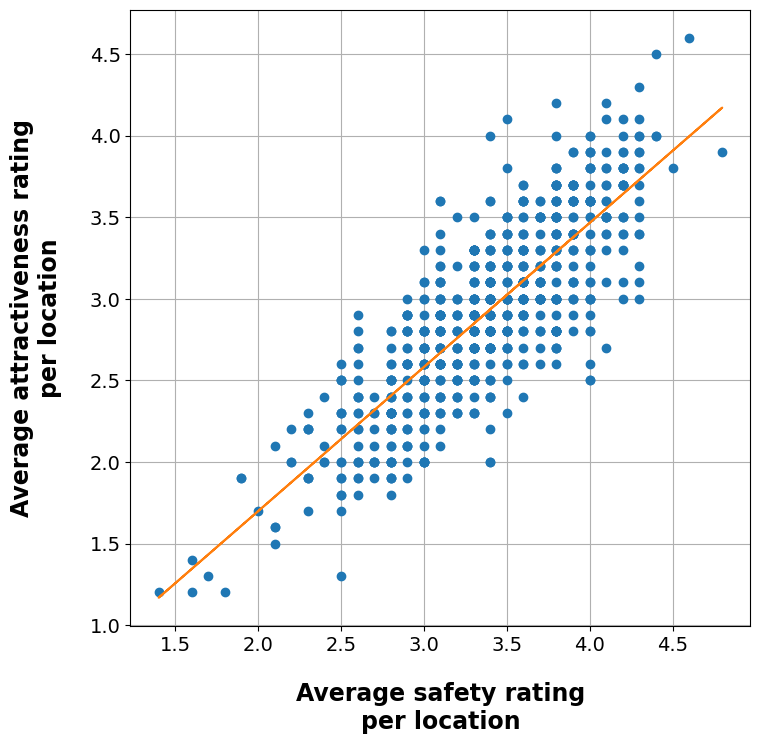

In [14]:



pd.get_option("display.max_columns")
params = {'axes.titlesize':'18',
          'xtick.labelsize':'14',
          'ytick.labelsize':'14'}
plt.rcParams.update(params)

x = gdf.safety_avg
y = gdf.attractiveness_avg
plt.figure(figsize=(8, 8))
plt.plot(x, y, 'o')
plt.grid()
plt.xlabel("Average safety rating\nper location",labelpad=20, weight='bold', size=17)
plt.ylabel("Average attractiveness rating\nper location",labelpad=20, weight='bold', size=17)
# create scatter plot


m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x +b)
print(m,b)
print(m*2+b)